In [1]:
import pandas as pd
import numpy as np
import nltk 
nltk.download('stopwords') 
nltk.download('wordnet')
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.ldamodel import LdaModel
from gensim import matutils, corpora
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
post_df_full = pd.read_csv("Data/MissUniversePredictions1.csv")

In [3]:
post_df_full1=post_df_full

In [4]:
def clean_text(text):
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'http\S+', '', text)    
    text = re.sub(r'#\w+', '', text)    
    return text

def remove_newlines(text):
    cleaned_text = re.sub(r'\n', ' ', text)    
    return cleaned_text

def remove_emojis_and_special_chars(text):
    cleaned_text = re.sub(r'❤️|🇹🇭|🌺|👑|✌🏻|💙|🌎|❤|💗|🏆|🇱🇦|🇵🇭|💜|🔥|☺️|🎉|✨️|📸|💛|👏🏻|✨', '', text)
    return cleaned_text

post_df_full1['post_text'] = post_df_full1['post_text'].fillna("")

In [6]:
post_df_full1['cleaned_post_text'] = ""

def clean_and_assign_text(row):
    original_text = row['post_text']
    cleaned_text = remove_emojis_and_special_chars(clean_text(remove_newlines(original_text)))
    return cleaned_text
post_df_full1['cleaned_post_text'] = post_df_full1.apply(clean_and_assign_text, axis=1)
post_df_full1[['post_id','post_text', 'cleaned_post_text']]


,post_id,post_text,cleaned_post_text
0,875795853991623,"Welcome home 🇹🇭 Antonia Porsild, 1st Runner-Up...","Welcome home Antonia Porsild, 1st Runner-Up M..."
1,875657524005456,"Yes queen, we heard you! Sheynnis Palacios Cor...","Yes queen, we heard you! Sheynnis Palacios Cor..."
2,875192604051948,𝐃𝐑𝐎𝐔𝐆𝐇𝐓 𝐁𝐑𝐄𝐀𝐊𝐄𝐑𝐒 | It was a tough competition ...,𝐃𝐑𝐎𝐔𝐆𝐇𝐓 𝐁𝐑𝐄𝐀𝐊𝐄𝐑𝐒 | It was a tough competition ...
3,875142550723620,"FAVORITAS DE PRINCIPIO A FIN, ANTES DE GANAR E...","FAVORITAS DE PRINCIPIO A FIN, ANTES DE GANAR E..."
4,875141117390430,The Gala Party 👑✨️ l Miss Universe 2023\n\n#Mi...,The Gala Party l Miss Universe 2023 ...
...,...,...,...
95,869628007941741,DAY 10 l Miss Universe 2023 Delegates l Laos 🇱...,DAY 10 l Miss Universe 2023 Delegates l Laos ...
96,869537041284171,OUR MUP PEOPLE'S CHOICE LEADER : MYANMAR 🇲🇲\n•...,OUR MUP PEOPLE'S CHOICE LEADER : MYANMAR 🇲🇲 • ...
97,869479791289896,DAY 10 l Miss Universe 2023 Delegates l Philip...,DAY 10 l Miss Universe 2023 Delegates l Philip...
98,869477637956778,𝐌𝐔 ‘𝟐𝟑 𝐖𝐀𝐓𝐂𝐇 | The stage is up! What can you s...,𝐌𝐔 ‘𝟐𝟑 𝐖𝐀𝐓𝐂𝐇 | The stage is up! What can you s...


In [ ]:
post_df_full1[['post_id','post_text', 'cleaned_post_text']].to_csv("Data/dataclean_posttext.csv", index=False)

In [ ]:
text = '. '.join(post_df_full1['cleaned_post_text'])


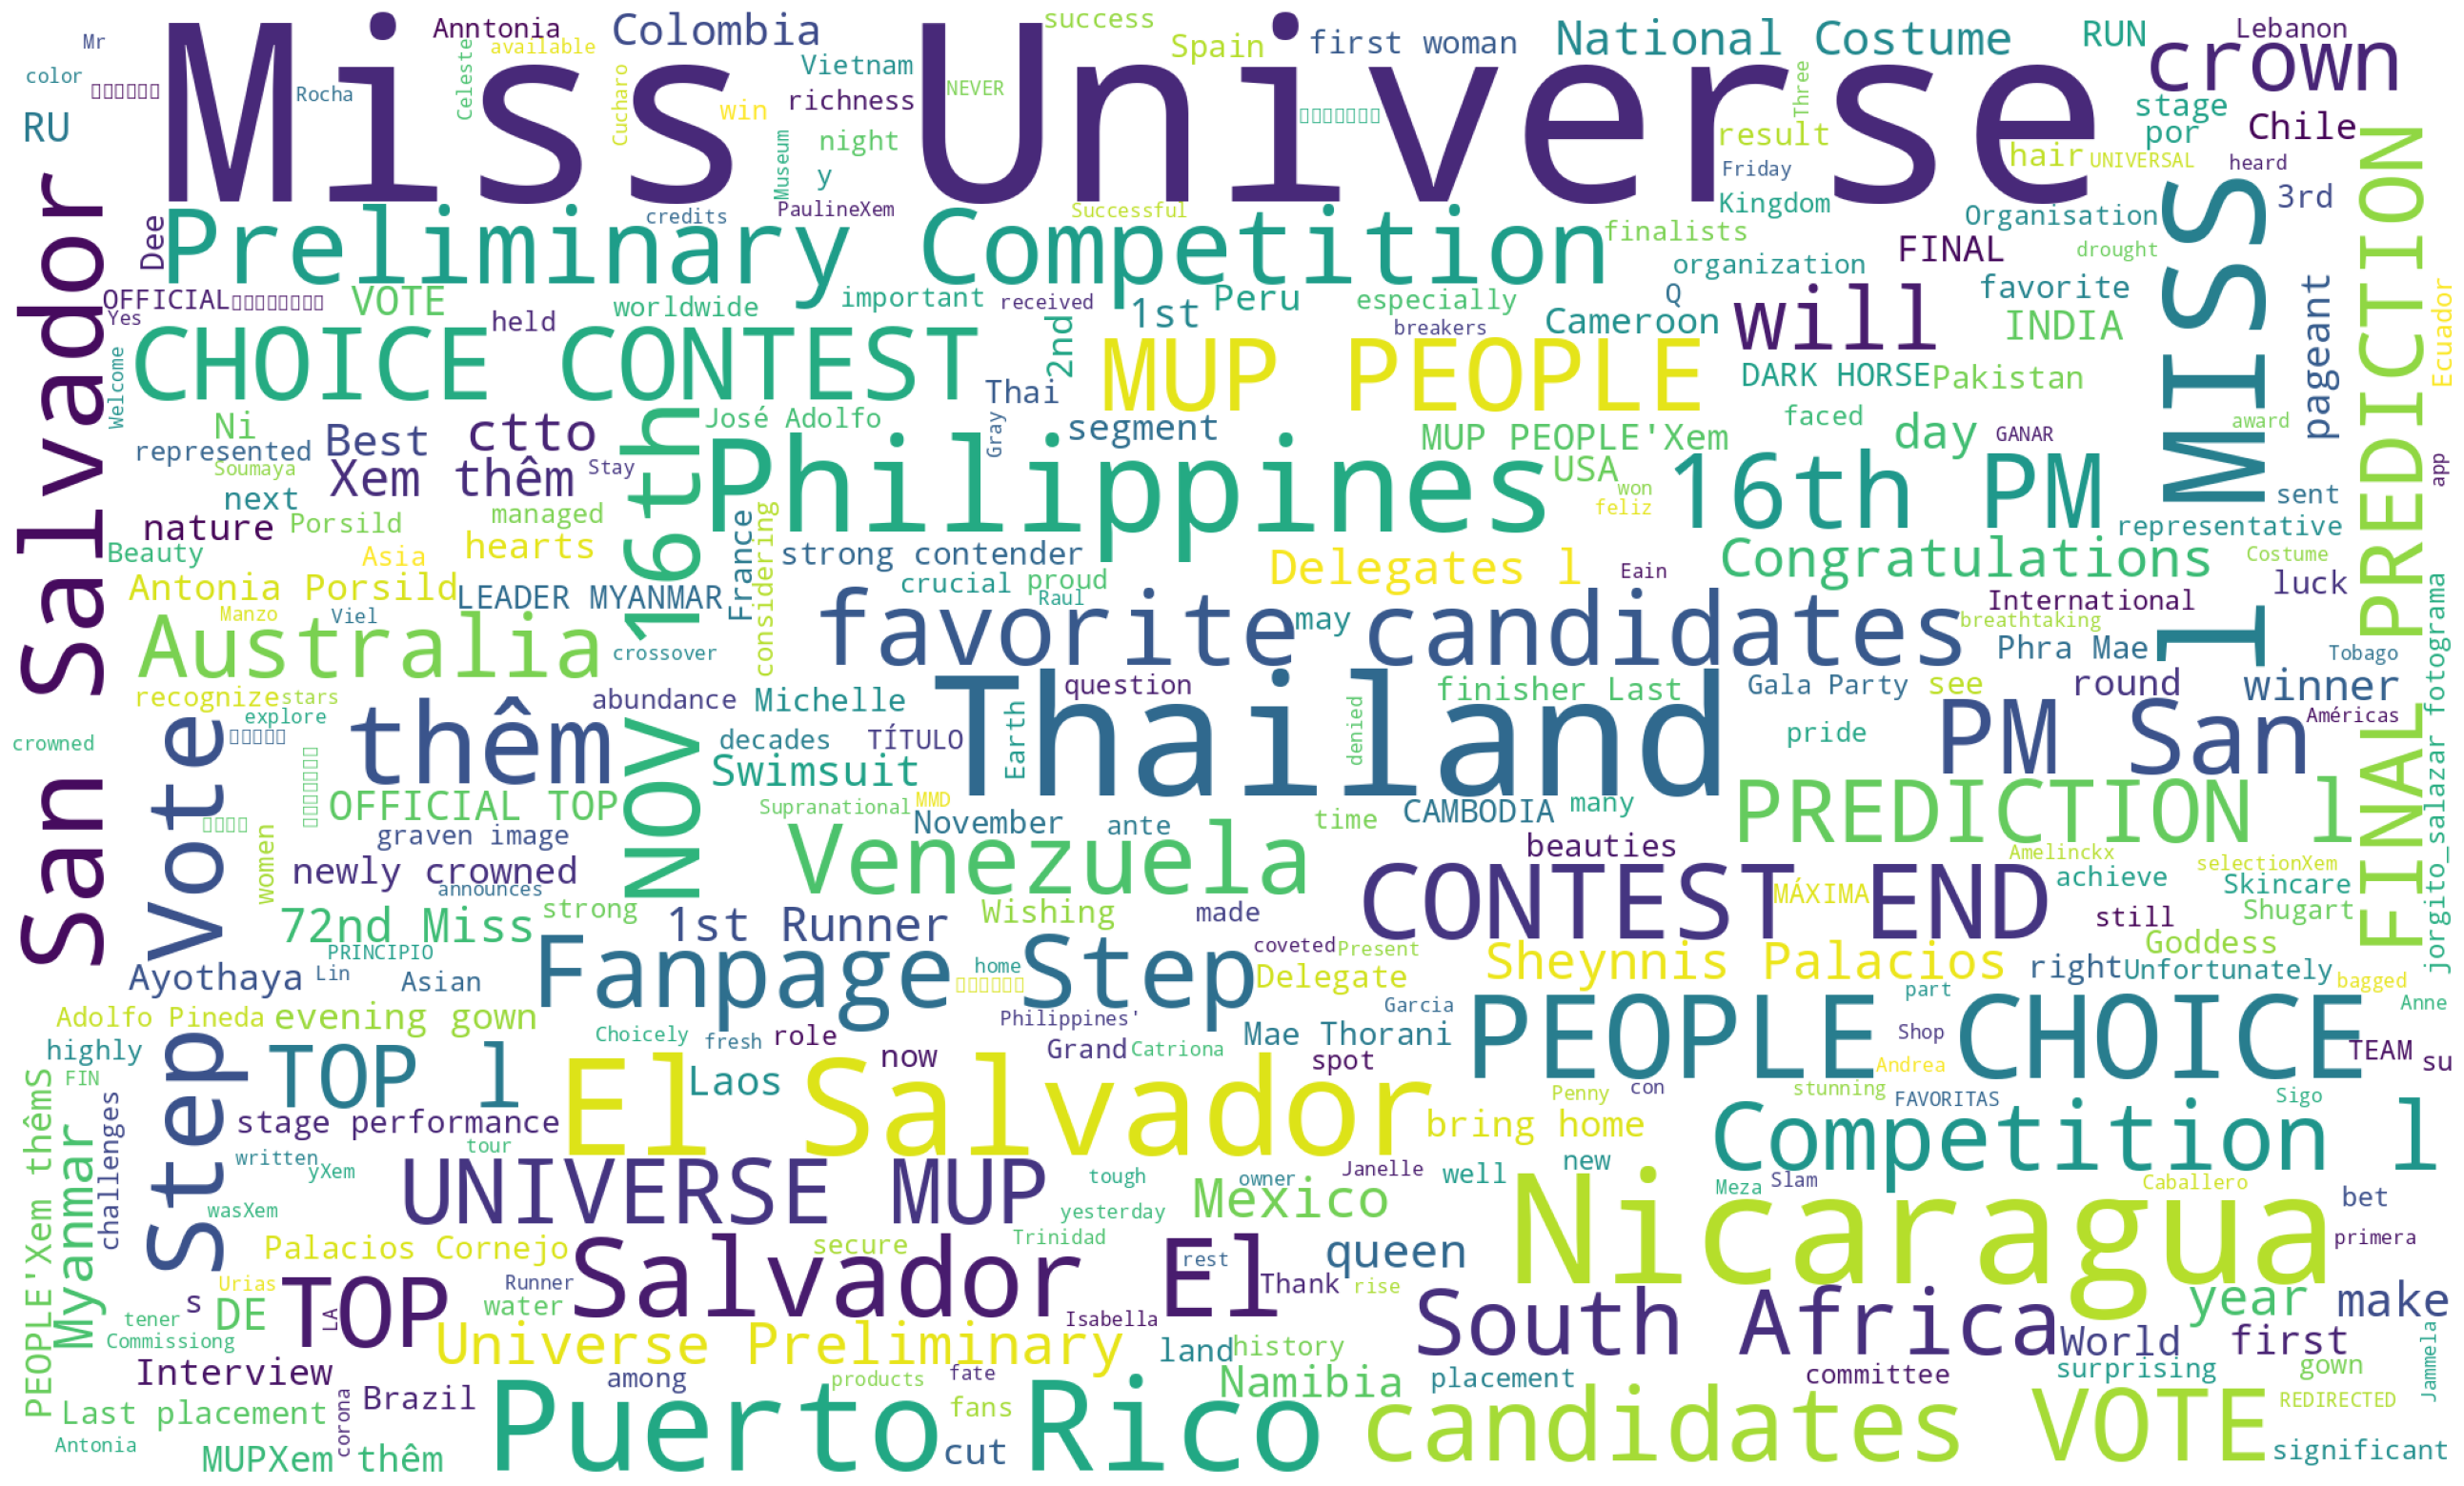

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_analyzer_scores(sentence):
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(sentence)
    return score

In [ ]:
sentences = [
    "I love spending time with my friends.",
    "The sky is blue.",
    "I'm feeling really sad today.",
    "I hate you",
    "i love you"
]

for sentence in sentences:
    score = sentiment_analyzer_scores(sentence)
    print(f"Sentence: {sentence}")
    print(f"Sentiment Score: {score}")
    print("---")

Sentence: I love spending time with my friends.
Sentiment Score: {'neg': 0.0, 'neu': 0.407, 'pos': 0.593, 'compound': 0.8074}
---
Sentence: The sky is blue.
Sentiment Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Sentence: I'm feeling really sad today.
Sentiment Score: {'neg': 0.43, 'neu': 0.38, 'pos': 0.19, 'compound': -0.4391}
---
Sentence: I hate you
Sentiment Score: {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}
---
Sentence: i love you
Sentiment Score: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
---


In [ ]:
sentiment_analyzer_scores(text)

{'neg': 0.074, 'neu': 0.712, 'pos': 0.214, 'compound': 1.0}

In [ ]:
sentiment_data = []
for index, row in post_df_full1.iterrows():
    text = row['cleaned_post_text']
    score = sentiment_analyzer_scores(text)
    sentiment_data.append({
        'post_id': row['post_id'],
        'post_text': text,
        'Điểm tích cực': score['pos'],
        'Điểm trung lập': score['neu'],
        'Điểm tiêu cực': score['neg'],
    })
sentiment_df = pd.DataFrame(sentiment_data)



In [ ]:
sentiment_df

,post_id,post_text,Điểm tích cực,Điểm trung lập,Điểm tiêu cực
0,875795853991623,"Welcome home Antonia Porsild, 1st Runner-Up M...",0.238,0.635,0.127
1,875657524005456,"Yes queen, we heard you! Sheynnis Palacios Cor...",0.230,0.770,0.000
2,875192604051948,𝐃𝐑𝐎𝐔𝐆𝐇𝐓 𝐁𝐑𝐄𝐀𝐊𝐄𝐑𝐒 | It was a tough competition ...,0.174,0.793,0.033
3,875142550723620,"FAVORITAS DE PRINCIPIO A FIN, ANTES DE GANAR E...",0.156,0.707,0.137
4,875141117390430,The Gala Party l Miss Universe 2023 ...,0.463,0.407,0.130
...,...,...,...,...,...
95,869628007941741,DAY 10 l Miss Universe 2023 Delegates l Laos ...,0.197,0.736,0.067
96,869537041284171,OUR MUP PEOPLE'S CHOICE LEADER : MYANMAR 🇲🇲 • ...,0.104,0.852,0.044
97,869479791289896,DAY 10 l Miss Universe 2023 Delegates l Philip...,0.197,0.736,0.067
98,869477637956778,𝐌𝐔 ‘𝟐𝟑 𝐖𝐀𝐓𝐂𝐇 | The stage is up! What can you s...,0.000,0.946,0.054


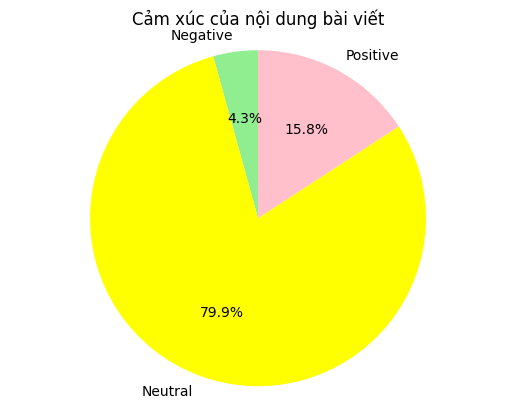

In [ ]:
score = sentiment_analyzer_scores(text)
labels = ['Negative', 'Neutral', 'Positive']
sizes = [score['neg'], score['neu'], score['pos']]
colors = ['lightgreen', 'yellow', 'pink']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Cảm xúc của nội dung bài viết')
plt.axis('equal')  
plt.show()

In [ ]:
documents =  post_df_full1['cleaned_post_text'].tolist()
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
corpus = matutils.Sparse2Corpus(X, documents_columns=False)
num_topics = 5  
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic) 


(0, '0.059*"2023" + 0.056*"miss" + 0.055*"universe" + 0.024*"thailand" + 0.023*"salvador"')
(1, '0.042*"miss" + 0.037*"universe" + 0.015*"2023" + 0.013*"philippines" + 0.011*"salvador"')
(2, '0.036*"miss" + 0.029*"universe" + 0.017*"2023" + 0.013*"salvador" + 0.012*"thailand"')
(3, '0.014*"ctto" + 0.013*"miss" + 0.011*"queen" + 0.010*"sheynnis" + 0.010*"palacios"')
(4, '0.047*"universe" + 0.045*"miss" + 0.037*"2023" + 0.016*"nicaragua" + 0.013*"competition"')
